In [30]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.3 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.7 MB/s eta 0:00:003.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import os
import locale
import matplotlib.pyplot as plt

In [2]:
data_folder = '/home/amy/projects/Tigo/data/original_data/'
file_1 = 'Compra_Cartera_202309_Part1.csv'


In [3]:
df_1 = pd.read_csv(data_folder + file_1, sep = ';')
df_1

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO
0,77566656,TIGO,COP,20230907,27-SEP-23 00:00:00,22463,02-OCT-23 00:00:00,22463,NaN
1,66600339,TIGO,COP,20230908,27-SEP-23 00:00:00,1288,09-SEP-23 00:00:00,",27",NaN
2,47353646,TIGO,COP,20230909,27-SEP-23 00:00:00,48500,27-SEP-23 00:00:00,"48500,19",NaN
3,47606520,TIGO,COP,20230919,05-OCT-23 00:00:00,1404,20-SEP-23 00:00:00,",03",NaN
4,27627439,TIGO,COP,20230920,05-OCT-23 00:00:00,31765,02-DIC-23 00:00:00,31765,NaN
...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,20230919,05-OCT-23 00:00:00,31122,20-OCT-23 00:00:00,31122,NaN
999996,77891570,TIGO,COP,20230920,05-OCT-23 00:00:00,2369,22-SEP-23 00:00:00,",33",NaN
999997,27657790,TIGO,COP,20230921,06-OCT-23 00:00:00,88858,11-OCT-23 00:00:00,88858,NaN
999998,98000378,TIGO,COP,20230919,05-OCT-23 00:00:00,45086,23-JUL-24 00:00:00,"4662,42",NaN


In [4]:

# Read the file as a single column
with open(data_folder + file_1, 'r') as f:
    lines = f.readlines()

# Process each line
data = []
for line in lines:
    # Split by ';' first
    parts = line.strip().split(';')
    # For the last part, split by ','
    last_part = parts[-1].split(',')
    # Combine parts
    data.append(parts[:-1] + last_part)

# Create DataFrame
columns = ['NO_FACTURA',
           'NOMBRE_EMISOR',
           'MONEDA',
           'FECHA_EMISION',
           'FECHA_VENCIMIENTO',
           'MONTO_FACTURA',
           'FECHA_PAGO',
           'MONTO_PAGO',
           'PERIODO']  # Adjust column names
df = pd.DataFrame(data, columns=columns)

# Set the first row as the header and drop it from the data
df.columns = df.iloc[0]  # Promote the first row to header
df = df[1:]  # Drop the first row from data
df.reset_index(drop=True, inplace=True)  # Reset the index


In [5]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO
0,77566656,TIGO,COP,20230907,27-SEP-23 00:00:00,22463,02-OCT-23 00:00:00,22463,None
1,66600339,TIGO,COP,20230908,27-SEP-23 00:00:00,1288,09-SEP-23 00:00:00,,27
2,47353646,TIGO,COP,20230909,27-SEP-23 00:00:00,48500,27-SEP-23 00:00:00,48500,19
3,47606520,TIGO,COP,20230919,05-OCT-23 00:00:00,1404,20-SEP-23 00:00:00,,03
4,27627439,TIGO,COP,20230920,05-OCT-23 00:00:00,31765,02-DIC-23 00:00:00,31765,None
...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,20230919,05-OCT-23 00:00:00,31122,20-OCT-23 00:00:00,31122,None
999996,77891570,TIGO,COP,20230920,05-OCT-23 00:00:00,2369,22-SEP-23 00:00:00,,33
999997,27657790,TIGO,COP,20230921,06-OCT-23 00:00:00,88858,11-OCT-23 00:00:00,88858,None
999998,98000378,TIGO,COP,20230919,05-OCT-23 00:00:00,45086,23-JUL-24 00:00:00,4662,42


In [6]:
# Convert the 'date' column to string and format it

# Convert the dates column to yyyy-mm-dd format
df['FECHA_EMISION'] = pd.to_datetime(df['FECHA_EMISION'], format='%Y%m%d', errors='coerce').dt.strftime('%Y-%m-%d')



In [7]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO
0,77566656,TIGO,COP,2023-09-07,27-SEP-23 00:00:00,22463,02-OCT-23 00:00:00,22463,None
1,66600339,TIGO,COP,2023-09-08,27-SEP-23 00:00:00,1288,09-SEP-23 00:00:00,,27
2,47353646,TIGO,COP,2023-09-09,27-SEP-23 00:00:00,48500,27-SEP-23 00:00:00,48500,19
3,47606520,TIGO,COP,2023-09-19,05-OCT-23 00:00:00,1404,20-SEP-23 00:00:00,,03
4,27627439,TIGO,COP,2023-09-20,05-OCT-23 00:00:00,31765,02-DIC-23 00:00:00,31765,None
...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,2023-09-19,05-OCT-23 00:00:00,31122,20-OCT-23 00:00:00,31122,None
999996,77891570,TIGO,COP,2023-09-20,05-OCT-23 00:00:00,2369,22-SEP-23 00:00:00,,33
999997,27657790,TIGO,COP,2023-09-21,06-OCT-23 00:00:00,88858,11-OCT-23 00:00:00,88858,None
999998,98000378,TIGO,COP,2023-09-19,05-OCT-23 00:00:00,45086,23-JUL-24 00:00:00,4662,42


In [8]:
# Map Spanish months to English
month_map = {
    'ENE': 'JAN', 'FEB': 'FEB', 'MAR': 'MAR', 'ABR': 'APR',
    'MAY': 'MAY', 'JUN': 'JUN', 'JUL': 'JUL', 'AGO': 'AUG',
    'SEP': 'SEP', 'OCT': 'OCT', 'NOV': 'NOV', 'DIC': 'DEC'
}


# Apply mapping only to non-null values
def map_months(date):
    if pd.isnull(date) or date == '':
        return date  # Leave NaN or empty values as is
    for sp_month, en_month in month_map.items():
        date = date.replace(sp_month, en_month)  # Replace Spanish month with English
    return date

# Apply the function to the column
df['FECHA_VENCIMIENTO'] = df['FECHA_VENCIMIENTO'].apply(map_months)
df['FECHA_PAGO'] = df['FECHA_PAGO'].apply(map_months)

In [9]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO
0,77566656,TIGO,COP,2023-09-07,27-SEP-23 00:00:00,22463,02-OCT-23 00:00:00,22463,None
1,66600339,TIGO,COP,2023-09-08,27-SEP-23 00:00:00,1288,09-SEP-23 00:00:00,,27
2,47353646,TIGO,COP,2023-09-09,27-SEP-23 00:00:00,48500,27-SEP-23 00:00:00,48500,19
3,47606520,TIGO,COP,2023-09-19,05-OCT-23 00:00:00,1404,20-SEP-23 00:00:00,,03
4,27627439,TIGO,COP,2023-09-20,05-OCT-23 00:00:00,31765,02-DEC-23 00:00:00,31765,None
...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,2023-09-19,05-OCT-23 00:00:00,31122,20-OCT-23 00:00:00,31122,None
999996,77891570,TIGO,COP,2023-09-20,05-OCT-23 00:00:00,2369,22-SEP-23 00:00:00,,33
999997,27657790,TIGO,COP,2023-09-21,06-OCT-23 00:00:00,88858,11-OCT-23 00:00:00,88858,None
999998,98000378,TIGO,COP,2023-09-19,05-OCT-23 00:00:00,45086,23-JUL-24 00:00:00,4662,42


In [10]:

# Convert the column with the date format '27-SEP-23 00:00:00' to '%Y-%m-%d'
df['FECHA_VENCIMIENTO'] = pd.to_datetime(df['FECHA_VENCIMIENTO'], format='%d-%b-%y %H:%M:%S', errors='coerce').dt.strftime('%Y-%m-%d')

# Convert the column with the date format '27-SEP-23 00:00:00' to '%Y-%m-%d'
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], format='%d-%b-%y %H:%M:%S', errors='coerce').dt.strftime('%Y-%m-%d')


In [11]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO
0,77566656,TIGO,COP,2023-09-07,2023-09-27,22463,2023-10-02,22463,None
1,66600339,TIGO,COP,2023-09-08,2023-09-27,1288,2023-09-09,,27
2,47353646,TIGO,COP,2023-09-09,2023-09-27,48500,2023-09-27,48500,19
3,47606520,TIGO,COP,2023-09-19,2023-10-05,1404,2023-09-20,,03
4,27627439,TIGO,COP,2023-09-20,2023-10-05,31765,2023-12-02,31765,None
...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,2023-09-19,2023-10-05,31122,2023-10-20,31122,None
999996,77891570,TIGO,COP,2023-09-20,2023-10-05,2369,2023-09-22,,33
999997,27657790,TIGO,COP,2023-09-21,2023-10-06,88858,2023-10-11,88858,None
999998,98000378,TIGO,COP,2023-09-19,2023-10-05,45086,2024-07-23,4662,42


In [12]:
# Calculate the difference in days

df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], format='%Y-%m-%d', errors='coerce')
df['FECHA_VENCIMIENTO'] = pd.to_datetime(df['FECHA_VENCIMIENTO'], format='%Y-%m-%d', errors='coerce')

df['days_to_pay'] = (df['FECHA_PAGO'] - df['FECHA_VENCIMIENTO']).dt.days

In [13]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO,days_to_pay
0,77566656,TIGO,COP,2023-09-07,2023-09-27,22463,2023-10-02,22463,None,5
1,66600339,TIGO,COP,2023-09-08,2023-09-27,1288,2023-09-09,,27,-18
2,47353646,TIGO,COP,2023-09-09,2023-09-27,48500,2023-09-27,48500,19,0
3,47606520,TIGO,COP,2023-09-19,2023-10-05,1404,2023-09-20,,03,-15
4,27627439,TIGO,COP,2023-09-20,2023-10-05,31765,2023-12-02,31765,None,58
...,...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,2023-09-19,2023-10-05,31122,2023-10-20,31122,None,15
999996,77891570,TIGO,COP,2023-09-20,2023-10-05,2369,2023-09-22,,33,-13
999997,27657790,TIGO,COP,2023-09-21,2023-10-06,88858,2023-10-11,88858,None,5
999998,98000378,TIGO,COP,2023-09-19,2023-10-05,45086,2024-07-23,4662,42,292


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   NO_FACTURA         1000000 non-null  object        
 1   NOMBRE_EMISOR      1000000 non-null  object        
 2   MONEDA             1000000 non-null  object        
 3   FECHA_EMISION      1000000 non-null  object        
 4   FECHA_VENCIMIENTO  1000000 non-null  datetime64[ns]
 5   MONTO_FACTURA      1000000 non-null  object        
 6   FECHA_PAGO         1000000 non-null  datetime64[ns]
 7   MONTO_PAGO         1000000 non-null  object        
 8   PERIODO            745415 non-null   object        
 9   days_to_pay        1000000 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 76.3+ MB


In [15]:
# Replace empty strings with NaN
df['MONTO_FACTURA'] = df['MONTO_FACTURA'].replace('', np.nan)
# Replace empty strings with NaN
df['MONTO_PAGO'] = df['MONTO_PAGO'].replace('', np.nan)


df['MONTO_FACTURA'] = df['MONTO_FACTURA'].astype('float')
df['MONTO_PAGO'] = df['MONTO_PAGO'].astype('float')
df['MONTO_PAGO'].fillna(0)

0         22463.0
1             0.0
2         48500.0
3             0.0
4         31765.0
           ...   
999995    31122.0
999996        0.0
999997    88858.0
999998     4662.0
999999    40010.0
Name: MONTO_PAGO, Length: 1000000, dtype: float64

In [16]:
df['monetary_loss'] = (df['MONTO_FACTURA'] - df['MONTO_PAGO'])
# Where MONTO_PAGO is NaN, set monetary_loss to MONTO_FACTURA
df['monetary_loss'] = df['monetary_loss'].fillna(df['MONTO_FACTURA'])

In [17]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO,days_to_pay,monetary_loss
0,77566656,TIGO,COP,2023-09-07,2023-09-27,22463.0,2023-10-02,22463.0,None,5,0.0
1,66600339,TIGO,COP,2023-09-08,2023-09-27,1288.0,2023-09-09,NaN,27,-18,1288.0
2,47353646,TIGO,COP,2023-09-09,2023-09-27,48500.0,2023-09-27,48500.0,19,0,0.0
3,47606520,TIGO,COP,2023-09-19,2023-10-05,1404.0,2023-09-20,NaN,03,-15,1404.0
4,27627439,TIGO,COP,2023-09-20,2023-10-05,31765.0,2023-12-02,31765.0,None,58,0.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,2023-09-19,2023-10-05,31122.0,2023-10-20,31122.0,None,15,0.0
999996,77891570,TIGO,COP,2023-09-20,2023-10-05,2369.0,2023-09-22,NaN,33,-13,2369.0
999997,27657790,TIGO,COP,2023-09-21,2023-10-06,88858.0,2023-10-11,88858.0,None,5,0.0
999998,98000378,TIGO,COP,2023-09-19,2023-10-05,45086.0,2024-07-23,4662.0,42,292,40424.0


In [18]:
df['loss'] = ((df['MONTO_FACTURA'] - df['MONTO_PAGO'])/df['MONTO_FACTURA']).fillna(1)

In [19]:
df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO,days_to_pay,monetary_loss,loss
0,77566656,TIGO,COP,2023-09-07,2023-09-27,22463.0,2023-10-02,22463.0,None,5,0.0,0.000000
1,66600339,TIGO,COP,2023-09-08,2023-09-27,1288.0,2023-09-09,NaN,27,-18,1288.0,1.000000
2,47353646,TIGO,COP,2023-09-09,2023-09-27,48500.0,2023-09-27,48500.0,19,0,0.0,0.000000
3,47606520,TIGO,COP,2023-09-19,2023-10-05,1404.0,2023-09-20,NaN,03,-15,1404.0,1.000000
4,27627439,TIGO,COP,2023-09-20,2023-10-05,31765.0,2023-12-02,31765.0,None,58,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,27610547,TIGO,COP,2023-09-19,2023-10-05,31122.0,2023-10-20,31122.0,None,15,0.0,0.000000
999996,77891570,TIGO,COP,2023-09-20,2023-10-05,2369.0,2023-09-22,NaN,33,-13,2369.0,1.000000
999997,27657790,TIGO,COP,2023-09-21,2023-10-06,88858.0,2023-10-11,88858.0,None,5,0.0,0.000000
999998,98000378,TIGO,COP,2023-09-19,2023-10-05,45086.0,2024-07-23,4662.0,42,292,40424.0,0.896598


For the late payment analysis:
Only consider invoices that have been paid in full (loss = 0)
Invoices paid early (i.e days to pay is <0) is set to 0.
Not bining the data

In [22]:
subset_df = df[df['loss'] == 0]


In [23]:
subset_df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO,days_to_pay,monetary_loss,loss
0,77566656,TIGO,COP,2023-09-07,2023-09-27,22463.0,2023-10-02,22463.0,None,5,0.0,0.0
2,47353646,TIGO,COP,2023-09-09,2023-09-27,48500.0,2023-09-27,48500.0,19,0,0.0,0.0
4,27627439,TIGO,COP,2023-09-20,2023-10-05,31765.0,2023-12-02,31765.0,None,58,0.0,0.0
5,17663594,TIGO,COP,2023-09-20,2023-10-05,38800.0,2023-10-08,38800.0,14,3,0.0,0.0
7,66439265,TIGO,COP,2023-09-01,2023-09-21,30800.0,2023-09-04,30800.0,29,-17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999993,17629012,TIGO,COP,2023-09-19,2023-10-05,30836.0,2023-10-11,30836.0,03,6,0.0,0.0
999994,66989283,TIGO,COP,2023-09-24,2023-10-09,38500.0,2023-09-27,38500.0,35,-12,0.0,0.0
999995,27610547,TIGO,COP,2023-09-19,2023-10-05,31122.0,2023-10-20,31122.0,None,15,0.0,0.0
999997,27657790,TIGO,COP,2023-09-21,2023-10-06,88858.0,2023-10-11,88858.0,None,5,0.0,0.0


In [27]:
# Optionally, set negative percentages (overpayments) to 0
subset_df['days_to_pay'] = subset_df['days_to_pay'].apply(lambda x: 0 if x < 0 else x)

/tmp/ipykernel_16945/3923681159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['days_to_pay'] = subset_df['days_to_pay'].apply(lambda x: 0 if x < 0 else x)


In [28]:
subset_df

,NO_FACTURA,NOMBRE_EMISOR,MONEDA,FECHA_EMISION,FECHA_VENCIMIENTO,MONTO_FACTURA,FECHA_PAGO,MONTO_PAGO,PERIODO,days_to_pay,monetary_loss,loss
0,77566656,TIGO,COP,2023-09-07,2023-09-27,22463.0,2023-10-02,22463.0,None,5,0.0,0.0
2,47353646,TIGO,COP,2023-09-09,2023-09-27,48500.0,2023-09-27,48500.0,19,0,0.0,0.0
4,27627439,TIGO,COP,2023-09-20,2023-10-05,31765.0,2023-12-02,31765.0,None,58,0.0,0.0
5,17663594,TIGO,COP,2023-09-20,2023-10-05,38800.0,2023-10-08,38800.0,14,3,0.0,0.0
7,66439265,TIGO,COP,2023-09-01,2023-09-21,30800.0,2023-09-04,30800.0,29,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999993,17629012,TIGO,COP,2023-09-19,2023-10-05,30836.0,2023-10-11,30836.0,03,6,0.0,0.0
999994,66989283,TIGO,COP,2023-09-24,2023-10-09,38500.0,2023-09-27,38500.0,35,0,0.0,0.0
999995,27610547,TIGO,COP,2023-09-19,2023-10-05,31122.0,2023-10-20,31122.0,None,15,0.0,0.0
999997,27657790,TIGO,COP,2023-09-21,2023-10-06,88858.0,2023-10-11,88858.0,None,5,0.0,0.0


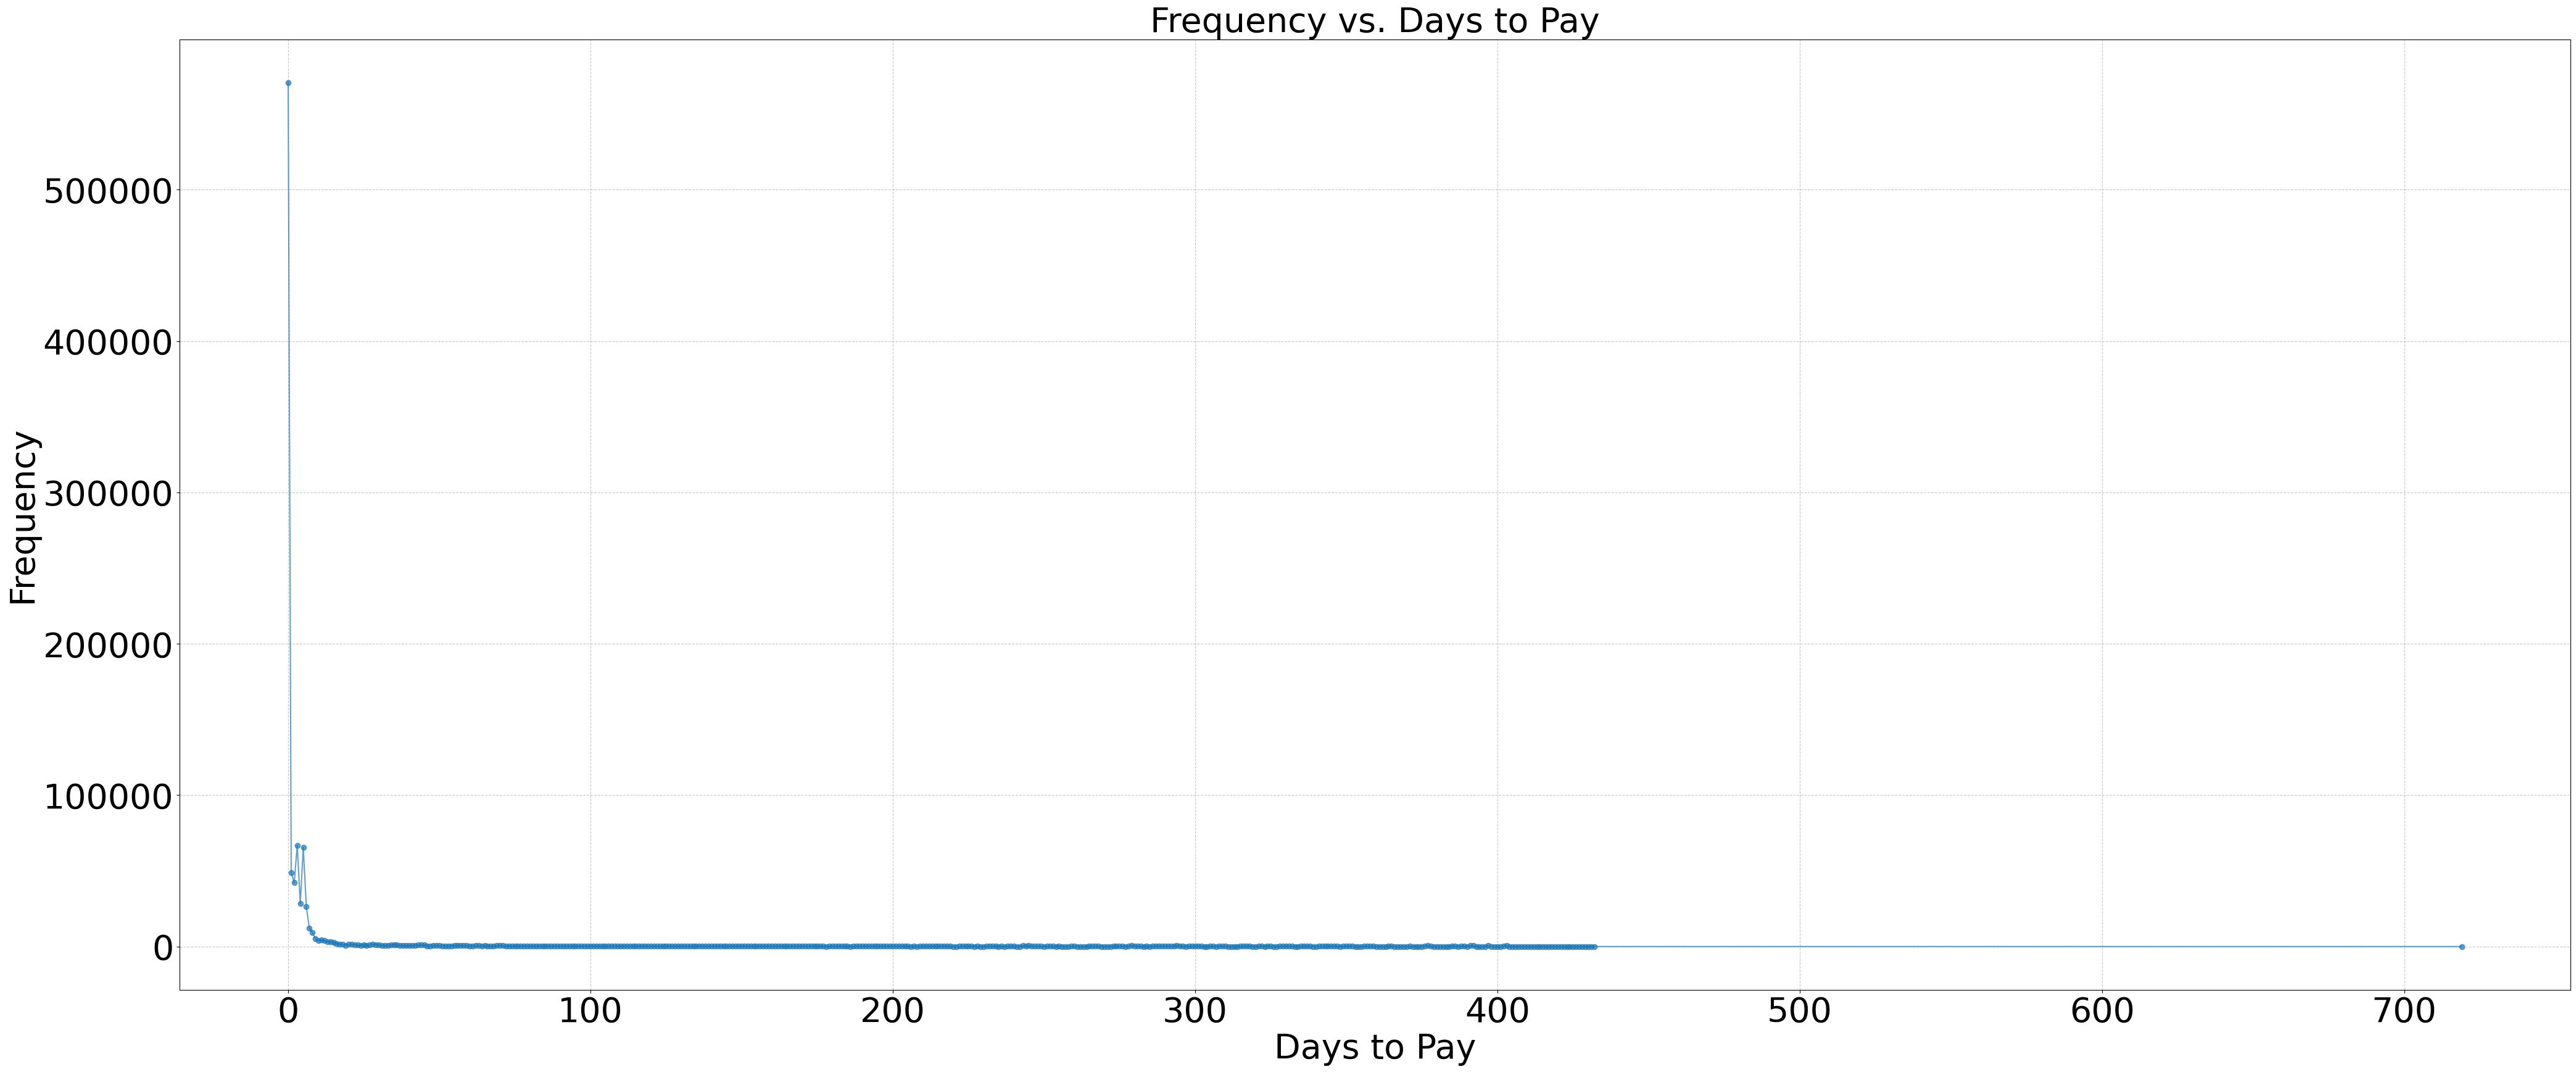

In [52]:
# Calculate frequency of each value in 'days_to_pay'
frequency = df['days_to_pay'].value_counts().sort_index()

# Plot frequency vs. days_to_pay as a line graph
plt.figure(figsize=(50, 20))
plt.plot(frequency.index, frequency.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Frequency vs. Days to Pay', fontsize=40)
plt.xlabel('Days to Pay', fontsize = 40)
plt.ylabel('Frequency', fontsize=40)
plt.xticks(fontsize=40)  # Set font size for x-axis ticks
plt.yticks(fontsize=40)  # Set font size for y-axis ticks
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.savefig('/home/amy/projects/Tigo/output/days_to_pay.png')
plt.show()




In [53]:
late_payment_percentiles = df['days_to_pay'].quantile(np.arange(0.01, 1.01, 0.01))

In [55]:
# Convert to a DataFrame for tabular representation

percentiles_table = pd.DataFrame({

    'Percentile': late_payment_percentiles.index * 100,  # Convert to percentage

    'Days_to_Pay': late_payment_percentiles.values

})




In [58]:
percentiles_table.to_csv('/home/amy/projects/Tigo/output/days_to_pay_percentiles.csv', sep = ',')